# Binary Classification

### Problem: We have to tell whether or not a Blood Donor is ideal or not.(In the sense whether they are more likely to respond when in cases of emergency. Higher regularity and such factors imply the more likely they will help.)

In [10]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.rc('font', size=14)
import seaborn as sns
sns.set(style='white')
sns.set(style='whitegrid', color_codes=True)

## Data Exploration

In [11]:
data = pd.read_csv('BloodDonation.csv', header=0)

data

Recency  Frequency  Monetary  Time  Class
0          2         50     12500    98      1
1          0         13      3250    28      1
2          1         16      4000    35      1
3          2         20      5000    45      1
4          1         24      6000    77      0
..       ...        ...       ...   ...    ...
743       23          2       500    38      0
744       21          2       500    52      0
745       23          3       750    62      0
746       39          1       250    39      0
747       72          1       250    72      0

[748 rows x 5 columns]

In [12]:
data.head(10)

Recency  Frequency  Monetary  Time  Class
0        2         50     12500    98      1
1        0         13      3250    28      1
2        1         16      4000    35      1
3        2         20      5000    45      1
4        1         24      6000    77      0
5        4          4      1000     4      0
6        2          7      1750    14      1
7        1         12      3000    35      0
8        2          9      2250    22      1
9        5         46     11500    98      1

In [13]:
data.tail(2)

Recency  Frequency  Monetary  Time  Class
746       39          1       250    39      0
747       72          1       250    72      0

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Recency    748 non-null    int64
 1   Frequency  748 non-null    int64
 2   Monetary   748 non-null    int64
 3   Time       748 non-null    int64
 4   Class      748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


As the above table shows we need not clean the table for missing values and we are taking all columns(features + class) into account.

In [15]:
print(data.shape)

(748, 5)


### Barplot for dependant Var

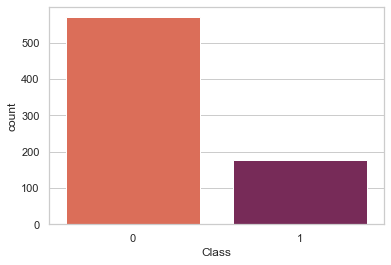

In [16]:
sns.countplot(x='Class', data=data, palette='rocket_r')
plt.show()

### Check for missing values

In [17]:
data.isnull().sum()

Recency      0
Frequency    0
Monetary     0
Time         0
Class        0
dtype: int64

### Client Recency Distribution

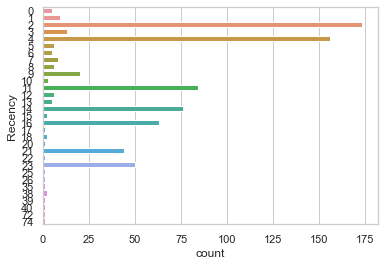

In [33]:
sns.countplot(y='Recency', data=data)
plt.show()

### Client Frequency Distibution

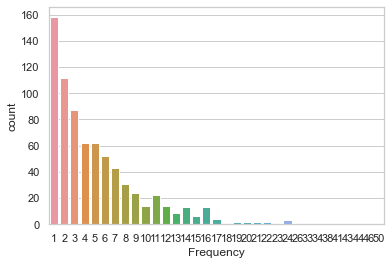

In [34]:
sns.countplot(x='Frequency', data=data)
plt.show()

### Donor Monetary Contribution

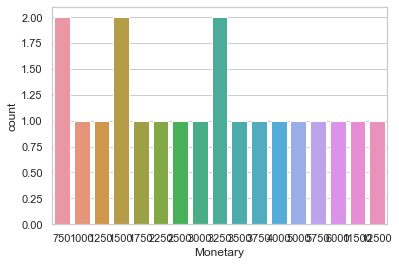

In [38]:
sns.countplot(x='Monetary', data=data.head(20))
plt.show()
# More the cases, more the numbers are overlapping so here first 20 cases are alone shown

### Donor Time Spent

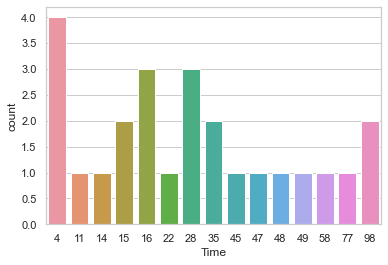

In [40]:
sns.countplot(x='Time', data=data.head(25))
plt.show()
# More the cases, more the numbers are overlapping so here first 20 cases are alone shown

## Data Preprocessing

Create dummy vars, (i.e) var with only two vals {'no': 0, 'yes': 1}

In logistic Regress models, encoding all of the independant vars as dummy vars allows easy interpretation and calculation of the odds ratios, and increases the stability and significance of the coefficients.

In [41]:
data1 = pd.get_dummies(data, columns=['Recency', 'Frequency', 'Monetary', 'Time'])

data1

Class  Recency_0  Recency_1  Recency_2  Recency_3  Recency_4  Recency_5  \
0        1          0          0          1          0          0          0   
1        1          1          0          0          0          0          0   
2        1          0          1          0          0          0          0   
3        1          0          0          1          0          0          0   
4        0          0          1          0          0          0          0   
..     ...        ...        ...        ...        ...        ...        ...   
743      0          0          0          0          0          0          0   
744      0          0          0          0          0          0          0   
745      0          0          0          0          0          0          0   
746      0          0          0          0          0          0          0   
747      0          0          0          0          0          0          0   

     Recency_6  Recency_7  Recency_8  ...  Time_81  Time_82  Time_83  Time_86  \
0            0          0          0  ...        0        0        0        0   
1            0          0          0  ...        0        0        0        0   
2            0          0          0  ...        0        0        0        0   
3            0          0          0  ...        0        0        0        0   
4            0          0          0  ...        0        0        0        0   
..         ...        ...        ...  ...      ...      ...      ...      ...   
743          0          0          0  ...        0        0        0        0   
744          0          0          0  ...        0        0        0        0   
745          0          0          0  ...        0        0        0        0   
746          0          0          0  ...        0        0        0        0   
747          0          0          0  ...        0        0        0        0   

     Time_87  Time_88  Time_89  Time_93  Time_95  Time_98  
0          0        0        0        0        0        1  
1          0        0        0        0        0        0  
2          0        0        0        0        0        0  
3          0        0        0        0        0        0  
4          0        0        0        0        0        0  
..       ...      ...      ...      ...      ...      ...  
743        0        0        0        0        0        0  
744        0        0        0        0        0        0  
745        0        0        0        0        0        0  
746        0        0        0        0        0        0  
747        0        0        0        0        0        0  

[748 rows x 176 columns]

In [42]:
data1.columns

Index(['Class', 'Recency_0', 'Recency_1', 'Recency_2', 'Recency_3',
       'Recency_4', 'Recency_5', 'Recency_6', 'Recency_7', 'Recency_8',
       ...
       'Time_81', 'Time_82', 'Time_83', 'Time_86', 'Time_87', 'Time_88',
       'Time_89', 'Time_93', 'Time_95', 'Time_98'],
      dtype='object', length=176)

## Check the independence between independant vars

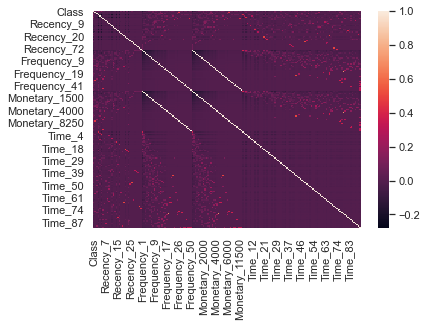

In [43]:
sns.heatmap(data1.corr())
plt.show()

## Split the data into training and test sets

In [54]:

X = data1.iloc[:, 1:]
y = data1.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## Check out whether training data is sufficient

In [51]:
X_train.shape

(561, 175)

## Logistic Regression Model

## Fit logistic regression to the training set

In [52]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Predicting the test set results and creating confusion matrix 

The confusion_matrix() function will calc a confusion matrix and ret the result as an arr.

In [53]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

print(confusion_matrix)

print(f"The result is telling that we have {confusion_matrix[0,0]}(+ve)+{confusion_matrix[1,1]}(-ve) correct predictions and {confusion_matrix[0,1]}(+ve)+{confusion_matrix[1,0]}(-ve) incorrect predictions.")

[[129   3]
 [ 46   9]]
The result is telling that we have 129(+ve)+9(-ve) correct predictions and 3(+ve)+46(-ve) incorrect predictions.


The precision is the ratio ( tp / (tp + fp) ) where 'tp' is the no.of true +ves and fp is the no. of false +ves. The precision is intuitivelly the ability of the classifier to not label a sample as +ve if it is negative.
The recall is the ratio ( tp / (tp + fn) ) where 'tp' = no. of true +ves and 'fn' = no.of false -ves. The recall is intuitively the ability of the classifier to find all the positive samples.
The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at '1' and worst value at '0'.
The F-beta score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall and precision are equally important.
The support is the number of occurrences of each class in y_test.

In [56]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

precision    recall  f1-score   support

           0       0.74      0.98      0.84       132
           1       0.75      0.16      0.27        55

    accuracy                           0.74       187
   macro avg       0.74      0.57      0.55       187
weighted avg       0.74      0.74      0.67       187



## Accuracy

In [55]:
print("Accuracy of logistic regression classifier on test set: {:.2f}".format(classifier.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.74


## Interpretation / Conclusion

The given model is just a simple one. It can do fair predictions and can be improved.